In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns

In [2]:
data=pd.read_csv("D:\\learning\\DA\\freecodecamp\\boilerplate-medical-data-visualizer\\medical_examination.csv")

In [3]:
data.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

Add an overweight column to the data. To determine if a person is overweight,

first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.


Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.
Any time a variable is set to None, make sure to set it to the correct code.

Unit tests are written for you under test_module.py.

In [5]:
data['bmi']=data['weight']/(data['height']/100)**2
data['Over-weight']=data['bmi'].apply(lambda bmi: 1 if bmi>=25 else 0)
data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,Over-weight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,1


In [6]:
data_copy = data.copy()


In [7]:
data_copy['cholesterol']=data_copy['cholesterol'].apply(lambda x: 0 if x==1 else 1)
data_copy['gluc']=data_copy['gluc'].apply(lambda x: 0 if x==1 else 1)
data_copy = data_copy.rename(columns={'cholesterol':'nmlsd_chol','gluc':'nmlsd_gluc'})
data_copy

,id,age,sex,height,weight,ap_hi,ap_lo,nmlsd_chol,nmlsd_gluc,smoke,alco,active,cardio,bmi,Over-weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [8]:
data_melt = data_copy.melt(id_vars='cardio')
cardio_1 = data_melt.loc[data_melt['cardio']==1]
count_1=cardio_1['variable'].value_counts()
cardio_0 = data_melt.loc[data_melt['cardio']==0]
count_0=cardio_0['variable'].value_counts()
count_0

id             35021
age            35021
sex            35021
height         35021
weight         35021
ap_hi          35021
ap_lo          35021
nmlsd_chol     35021
nmlsd_gluc     35021
smoke          35021
alco           35021
active         35021
bmi            35021
Over-weight    35021
Name: variable, dtype: int64

In [9]:
data_for_cardio_=data_copy[['nmlsd_chol','nmlsd_gluc','smoke','alco','active','Over-weight','cardio']]


In [10]:
data_melt = data_for_cardio_.melt(id_vars='cardio')

cardio_1 = data_melt.loc[data_melt['cardio']==1]


cardio_0 = data_melt.loc[data_melt['cardio']==0]




In [11]:
cardio_1

,cardio,variable,value
1,1,nmlsd_chol,1
2,1,nmlsd_chol,1
3,1,nmlsd_chol,0
7,1,nmlsd_chol,1
15,1,nmlsd_chol,0
...,...,...,...
419993,1,Over-weight,0
419994,1,Over-weight,1
419996,1,Over-weight,1
419997,1,Over-weight,1


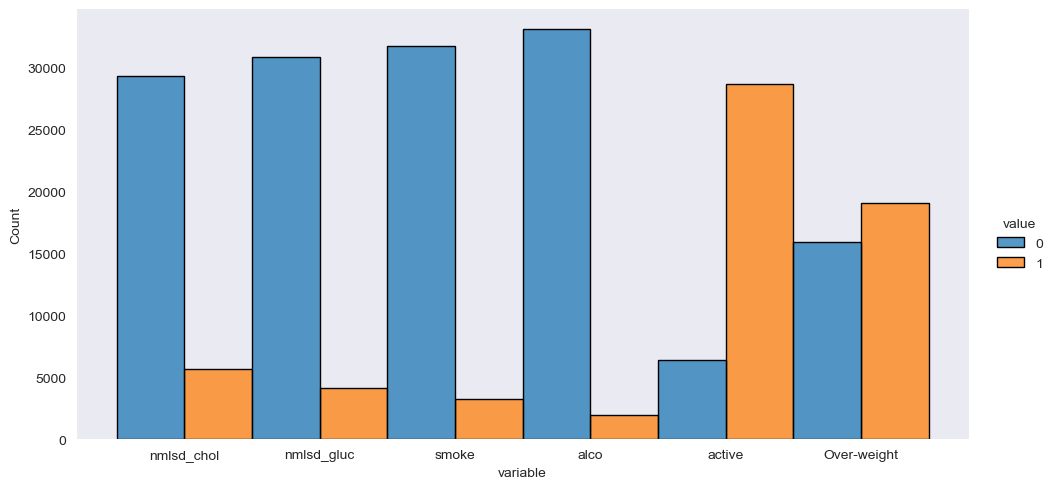

In [12]:
sns.axes_style("darkgrid")
sns.set_style('dark')
fig = sns.displot(cardio_0, x="variable", hue='value', multiple="dodge", height=5, aspect=2, edgecolor='black')


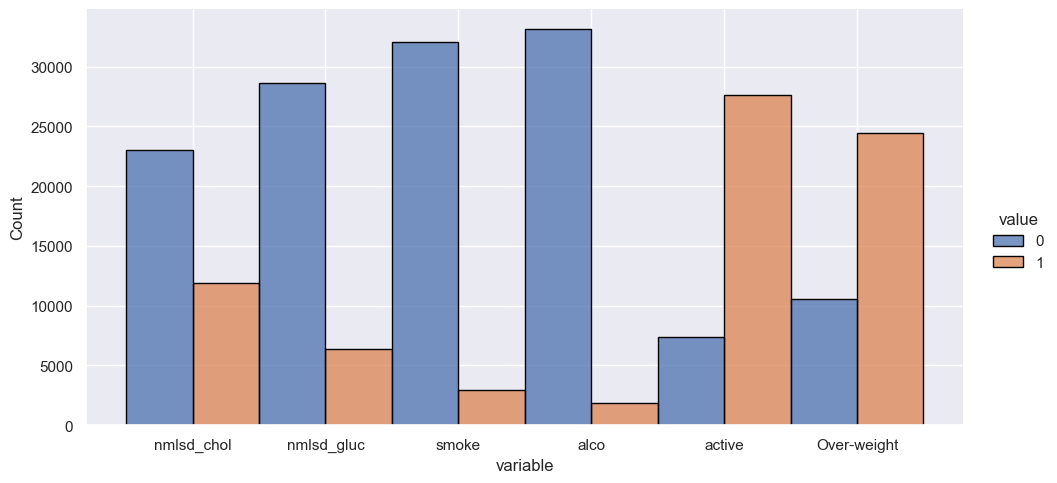

In [13]:
sns.set()
sns.displot(cardio_1, x="variable", hue='value', multiple="dodge", height=5, aspect=2, edgecolor='black')

<Axes: xlabel='variable', ylabel='count'>

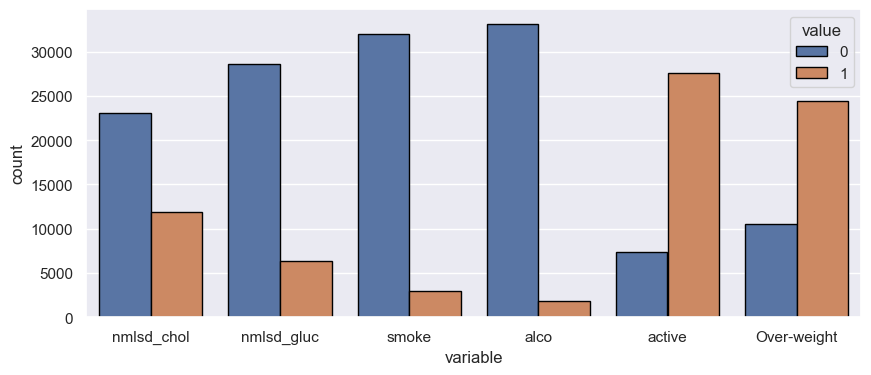

In [14]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(cardio_1, x="variable", hue='value', edgecolor='black')

<Axes: xlabel='variable', ylabel='count'>

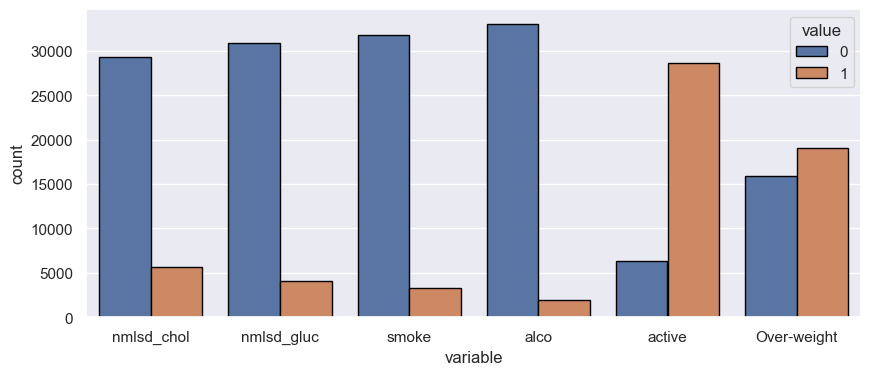

In [15]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(cardio_0, x="variable", hue='value', edgecolor='black')

In [16]:
dia = data_copy.loc[(data_copy['ap_lo'] <= data_copy['ap_hi'])]

In [17]:
height = dia.loc[(dia['height'] >= dia['height'].quantile(0.025))]

In [18]:
height_ = height.loc[(height['height'] <= height['height'].quantile(0.975))]

In [19]:
weight = height_.loc[(data_copy['weight'] <= height_['weight'].quantile(0.975))]

In [20]:
cleaned = weight.loc[(data_copy['weight'] >= weight['weight'].quantile(0.025))]
cleaned

,id,age,sex,height,weight,ap_hi,ap_lo,nmlsd_chol,nmlsd_gluc,smoke,alco,active,cardio,bmi,Over-weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [21]:
corr_matrix = cleaned.corr()
print(corr_matrix)

                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002623  0.003799  0.000221  0.000144  0.003489   
age          0.002623  1.000000 -0.018274 -0.077426  0.069705  0.018482   
sex          0.003799 -0.018274  1.000000  0.504722  0.130116  0.004941   
height       0.000221 -0.077426  0.504722  1.000000  0.248868  0.004300   
weight       0.000144  0.069705  0.130116  0.248868  1.000000  0.026527   
ap_hi        0.003489  0.018482  0.004941  0.004300  0.026527  1.000000   
ap_lo        0.000429  0.152787  0.059500  0.015356  0.223786  0.072260   
nmlsd_chol   0.003867  0.129582 -0.037669 -0.064477  0.132686  0.022606   
nmlsd_gluc   0.002477  0.087280 -0.021178 -0.031410  0.104475  0.011004   
smoke       -0.002403 -0.044208  0.337682  0.187389  0.055805 -0.001978   
alco        -0.001039 -0.026956  0.169178  0.089257  0.058286  0.000607   
active       0.005890 -0.011471  0.007702 -0.005042 -0.012112 -0.000162   
cardio       0.003770  0.

<Axes: >

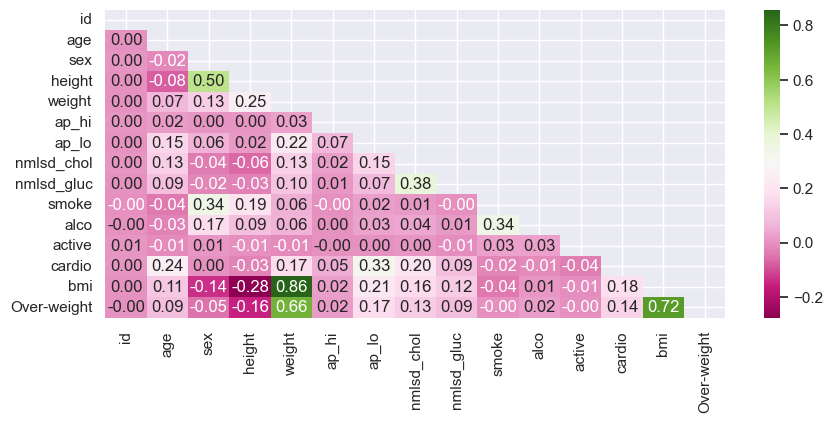

In [22]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, fmt=".2f", cmap="PiYG")


<Axes: >

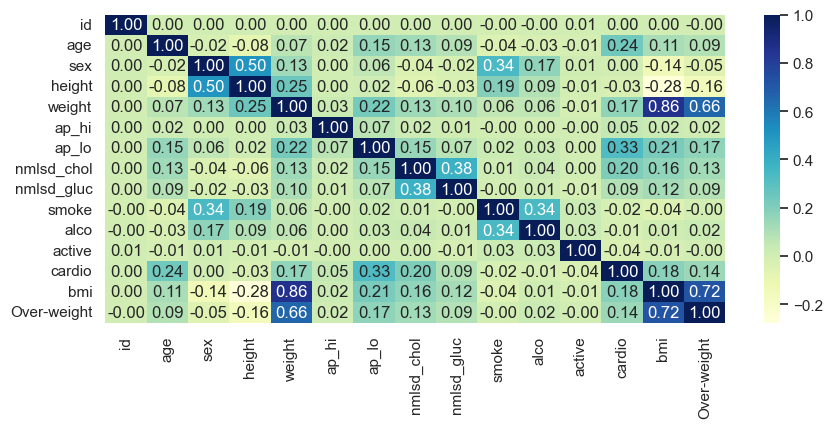

In [23]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")


In [24]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa